In [ ]:
from google.colab import drive
file1 = ("/content/drive/MyDrive/archive/train")

file2 = ("/content/drive/MyDrive/archive/valid")

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                   horizontal_flip = True)

train_set = train_datagen.flow_from_directory(file1,
                                                 target_size = (384, 384),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

import tensorflow as tf

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(file2,
                                            target_size = (384, 384),
                                            batch_size = 2,
                                            class_mode = 'binary')

Found 60 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(1, activation = 'relu',input_shape=[384, 384, 3]))
cnn.add(tf.keras.layers.Conv2D(128, kernel_size=[3,3], padding='valid', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[5,5], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(64, kernel_size=[3,3], padding='valid', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

history = cnn.fit(train_set, validation_data =test_set, epochs=30, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384, 384, 1)       4         
                                                                 
 conv2d (Conv2D)             (None, 382, 382, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 189, 189, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 187, 187, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 93, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 32)        8

In [ ]:
cnn.save("snake_pred1.h5")

[[5.296063e-06]]
This is 100.00 percent chance anaconda and 0.00 python.


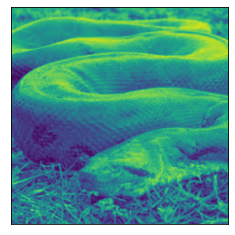

In [ ]:
import cv2
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/anaconda3.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

x=cnn.predict([prepare('/anaconda3.jpg')])

print(x)
score = x[0]
print(
    "This is %.2f percent chance anaconda and %.2f python."
    %(100*(1-score), 100*score)
)
from matplotlib import pyplot as plt

img = cv2.imread('/anaconda3.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

[[0.9999999]]
This is 0.00 percent chance anaconda and 100.00 python.


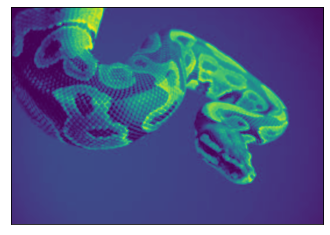

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/python.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y=cnn.predict([prepare('/python.jpg')])

print(y)
score = y[0]
print(
    "This is %.2f percent chance anaconda and %.2f python."
    %(100*(1-score), 100*score)
)
from matplotlib import pyplot as plt

img = cv2.imread('/python.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()